# Project 10 Heart Disease Predcition
--->To Predict the presence of heart disease in the patient

# Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets Load the dataset

In [282]:
data=pd.read_csv('heartdiseases.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


## Lets Check the null values

In [36]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

From the above we can see that there are no null values

In [37]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


From the above summary we can see that most of the data is evenly distributed, however there is significant difference in cholestrol and max cholestrol in our datatset

## Lets Check the Correlation between dataset

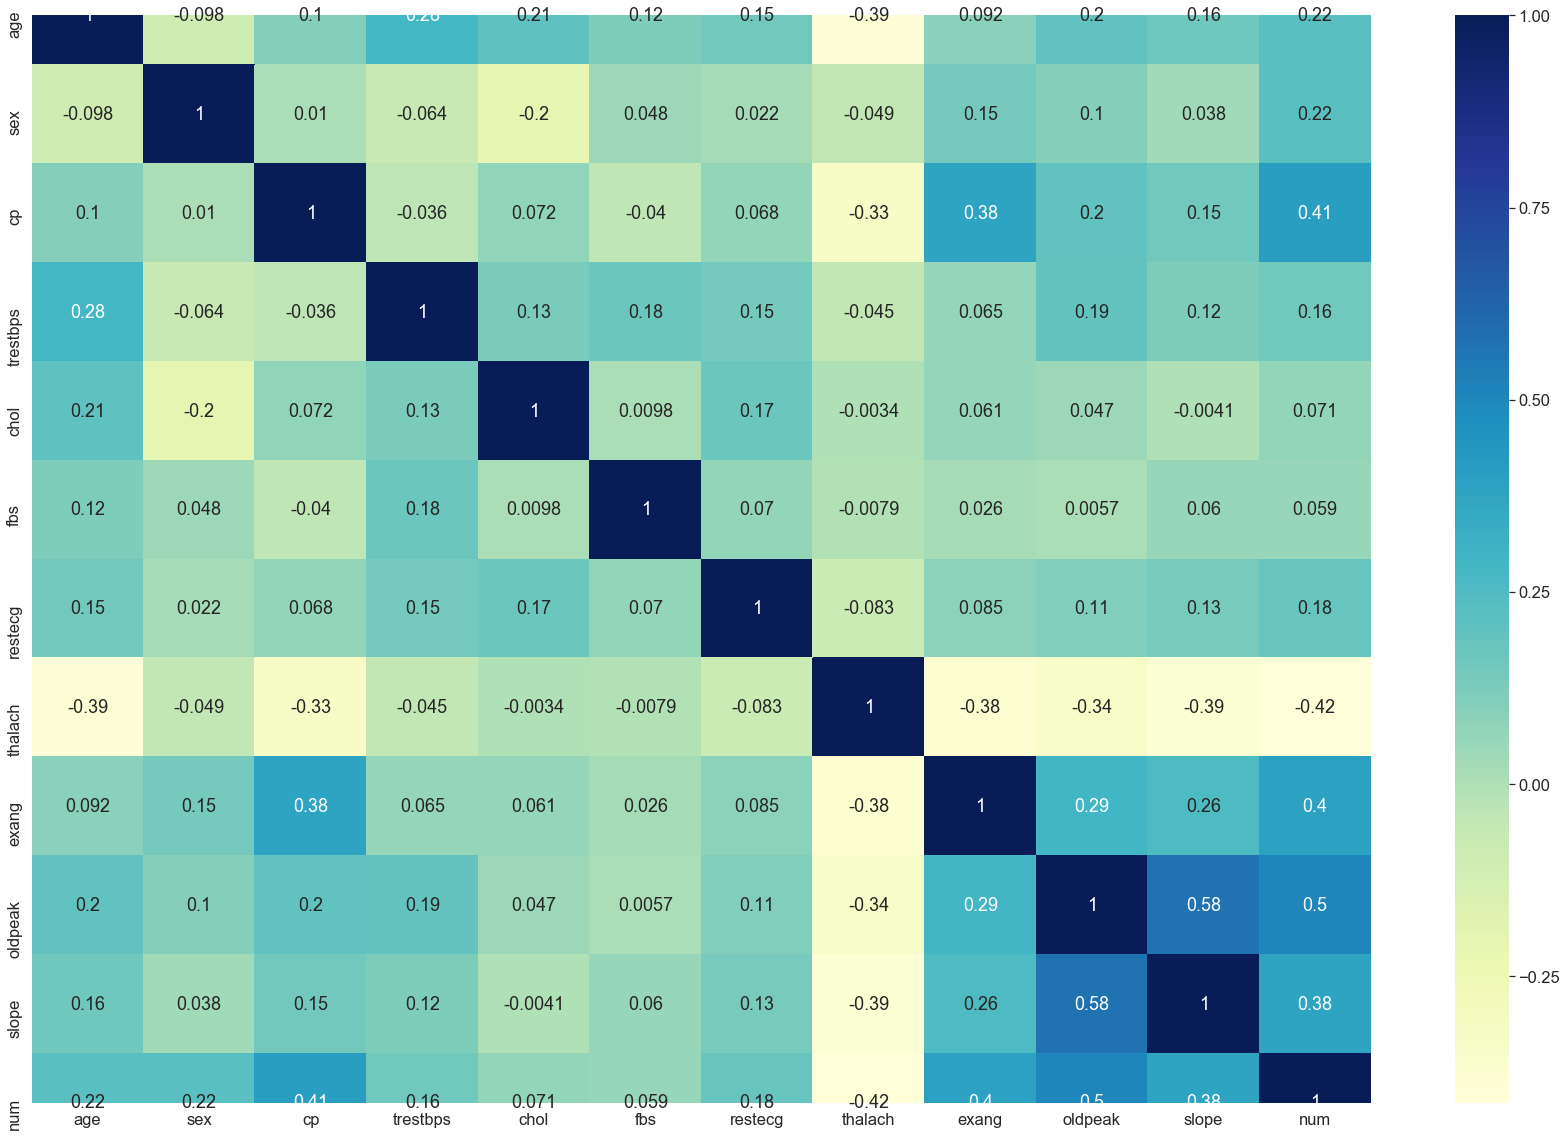

In [38]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu')

From the above we can see that most of the data is postivly correlated with our dependent variable which is good for our model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DA53D3788>,
      dtype=object)

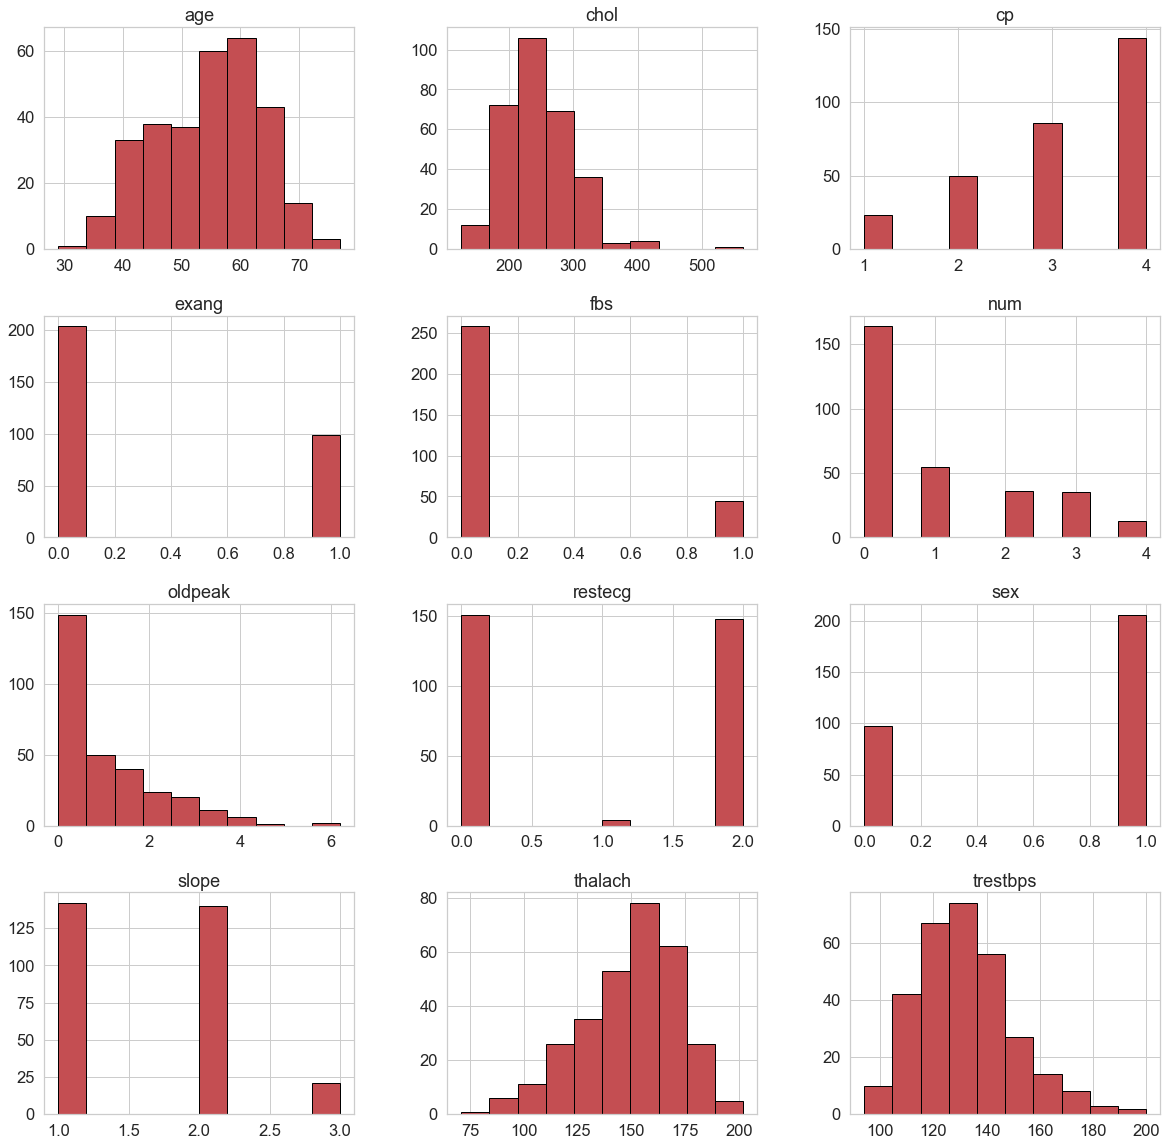

In [39]:
sns.set(style='whitegrid', palette='deep', font_scale=1.5)
data.hist(figsize=(20,20),color='r',edgecolor="black",linewidth=1)

From the above sets of graphs we can see that most of our data are postively and negatively skewed, so we have to measure and treat those skewness

## Lets do the EDA

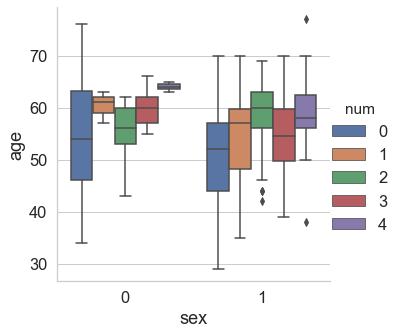

In [42]:
sns.catplot(y='age',x='sex',hue='num',data=data,kind='box')

From the above graph we can see that males whose age is more that 60 years have high chances of cancer compared to females, however for females there are more number of chances over 65 years for having fourth stage cancer.

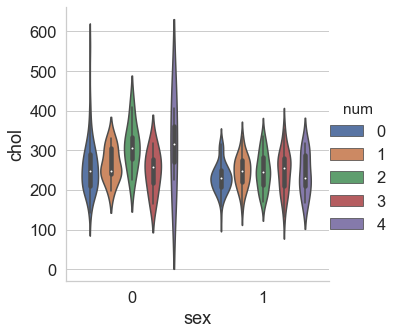

In [50]:
sns.catplot(x="sex", y="chol",hue='num',data=data,kind='violin')

From the above graph we can see that majority of the patient develop heart disease when cholestrol level is high.

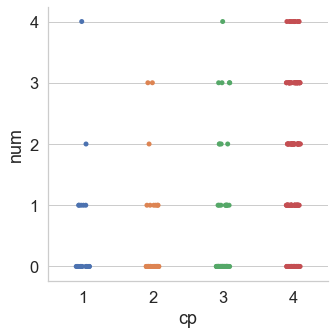

In [52]:
sns.catplot(x='cp',y='num',data=data)

From the above graph we can see that the people who have asymptopic pain will have heart disease most of time.

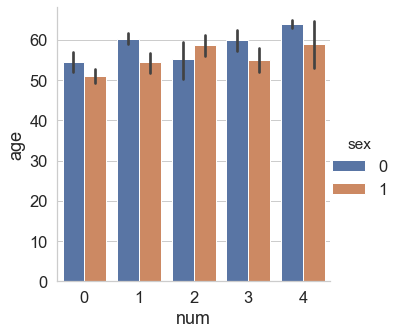

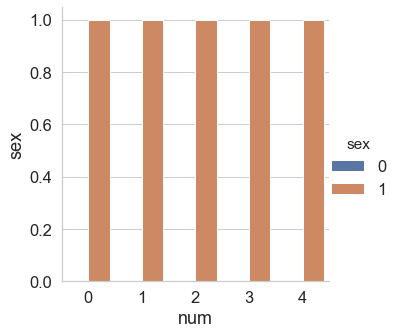

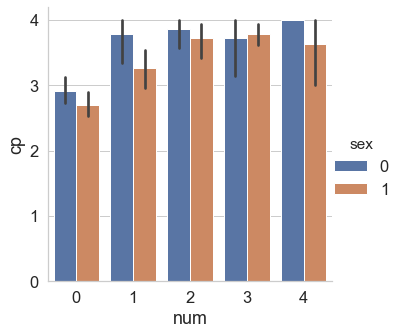

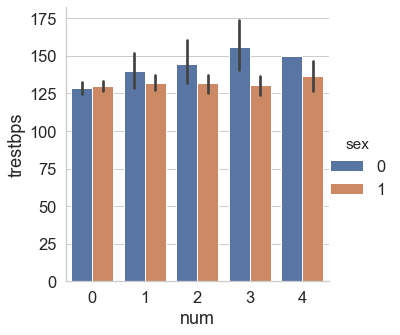

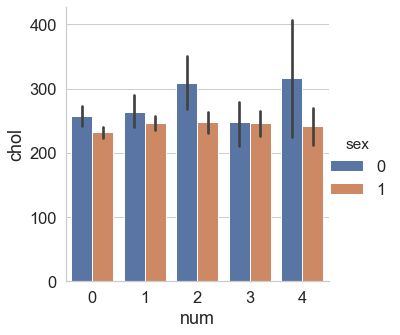

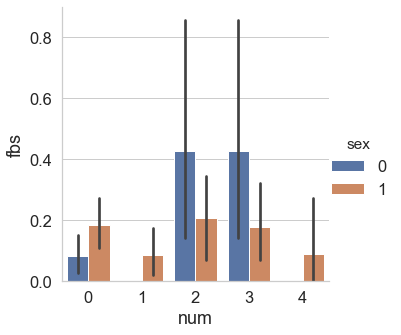

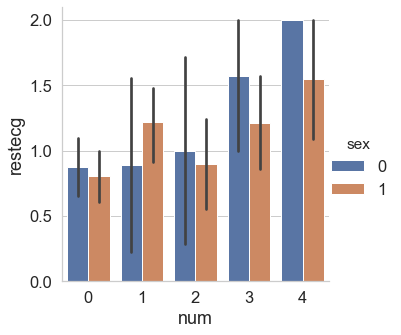

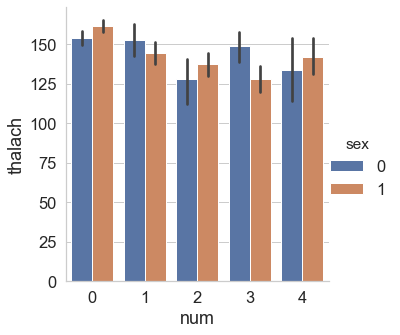

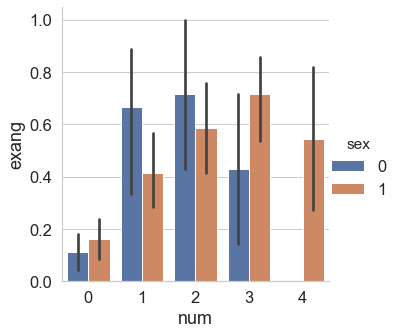

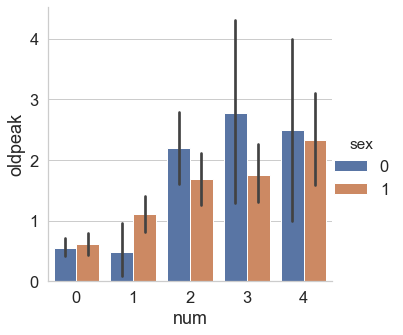

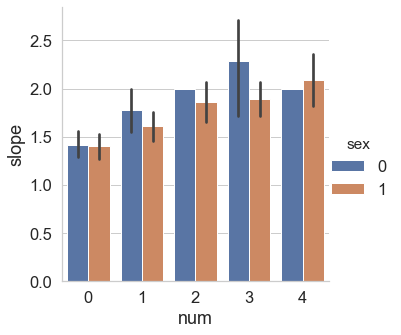

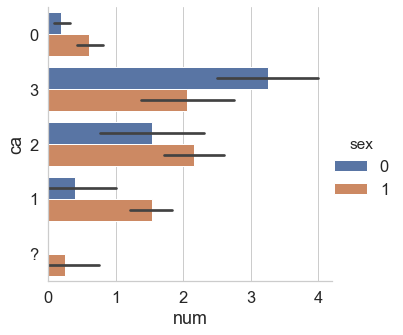

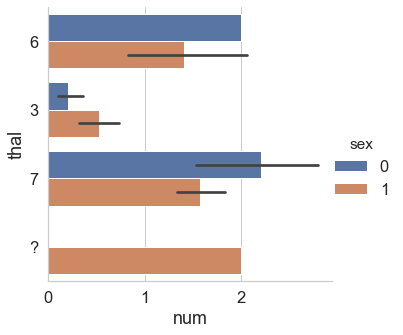

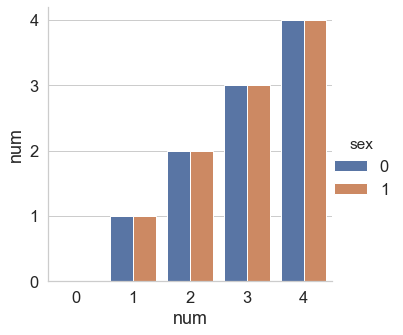

In [55]:
for cat in data:
    sns.catplot(x='num',y=cat,hue='sex',data=data,kind='bar')

From the above sets of graphs provide us a lot of valueable information about our dataset in comparision to the patient, gener and most of the features, as we can see that most of cancer cases occurs above 50 years of age, females have higher number of chest pains regardless of cancer might be beacuse of breast cancer, generally resting bloodpressure is high for most of the cancer patients but females have silghtly high, resting electrocardiographic is between 1 to 2 for patient with stage 3,4,

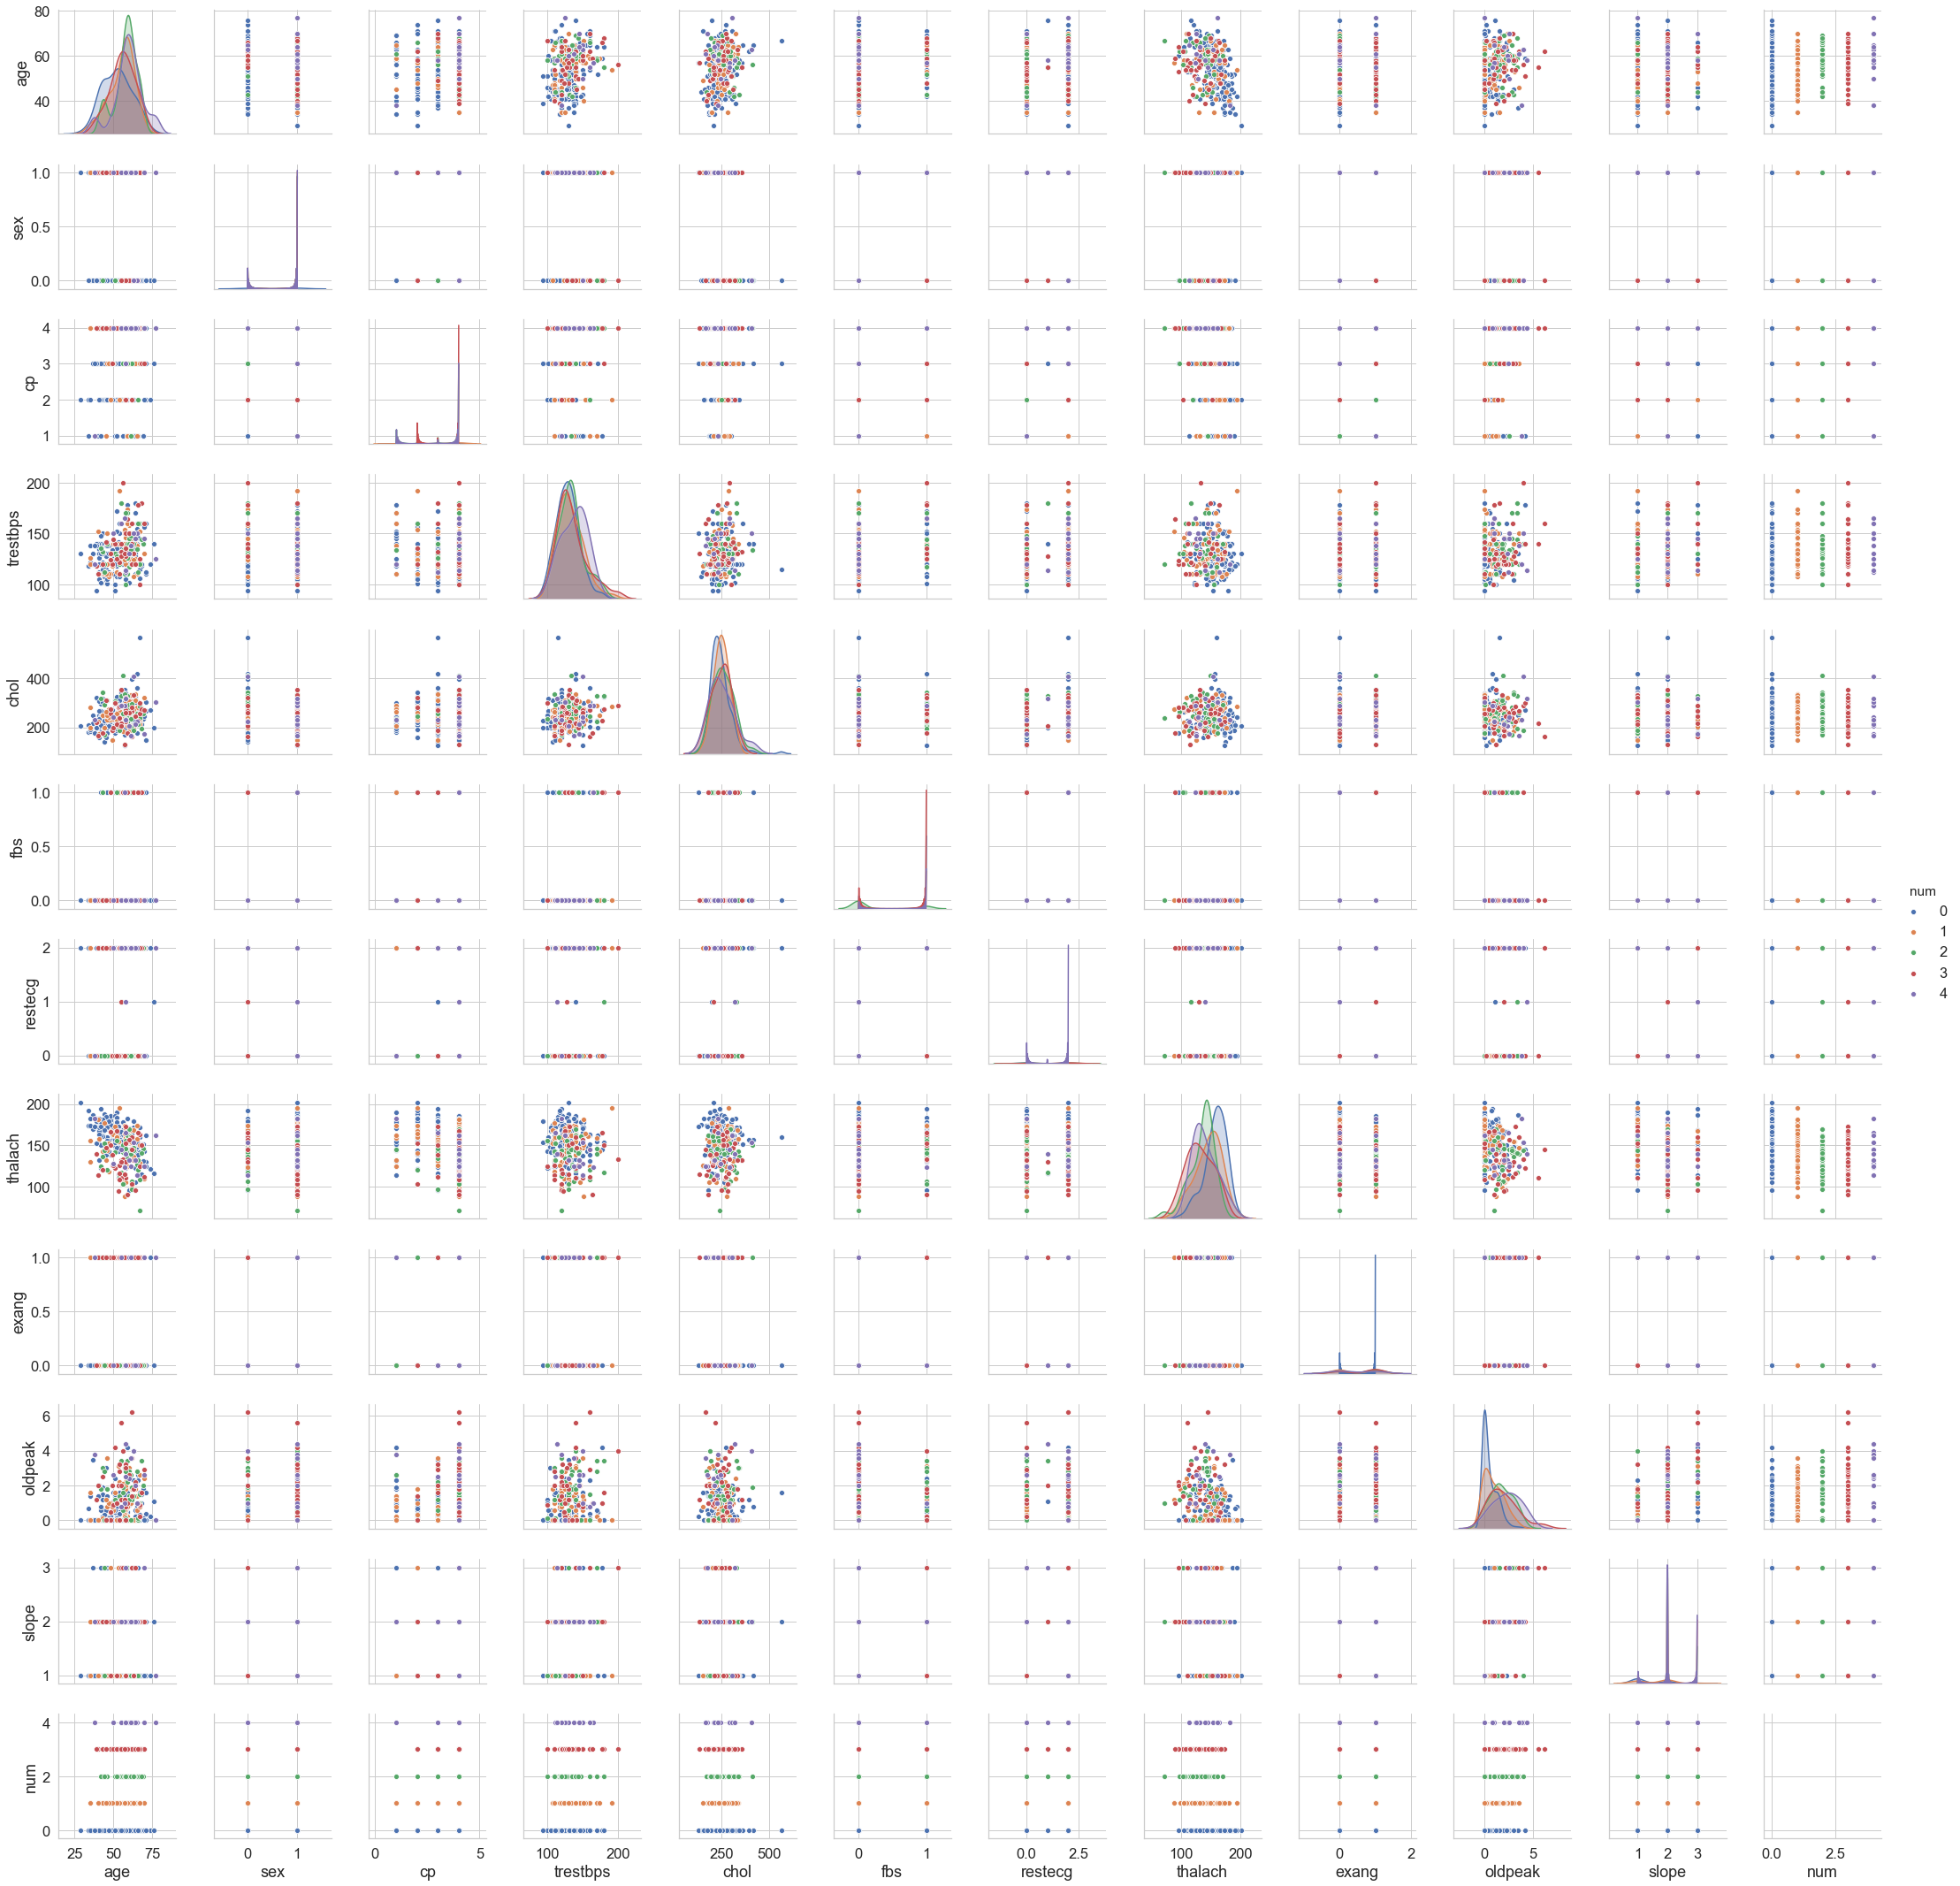

In [56]:
sns.pairplot(data,hue='num')

## Lets split and treat the categorical variables

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [284]:
data['num'].unique()
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['thal']=LE.fit_transform(data['thal'])
data['ca']=LE.fit_transform(data['ca'])
data['num']=LE.fit_transform(data['num'])

In [285]:
data['num']=pd.get_dummies(data['num'])
data['num'].unique()

array([1, 0], dtype=uint64)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int32
thal        303 non-null int32
num         303 non-null uint8
dtypes: float64(1), int32(2), int64(10), uint8(1)
memory usage: 28.8 KB


In [235]:
x=data.iloc[:,:-1]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0


In [236]:
y=data['num']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: uint8

In [286]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [287]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [288]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Lets implement ML Alogrithms

In [289]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [290]:
models = []
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=40)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=40)))
models.append(('ExtraTreesClassifier',ExtraTreesClassifier(random_state=40)))
models.append(('AdaBoostClassifier',AdaBoostClassifier(random_state=40)))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.8688524590163934


F1_Score: 0.8518518518518519


Precision_Score: 0.8214285714285714


Cross_Val_Score =  0.8303707823507601


roc_auc_score =  0.8708791208791209


classification_report
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.82      0.88      0.85        26

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



[[30  5]
 [ 3 23]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_sh

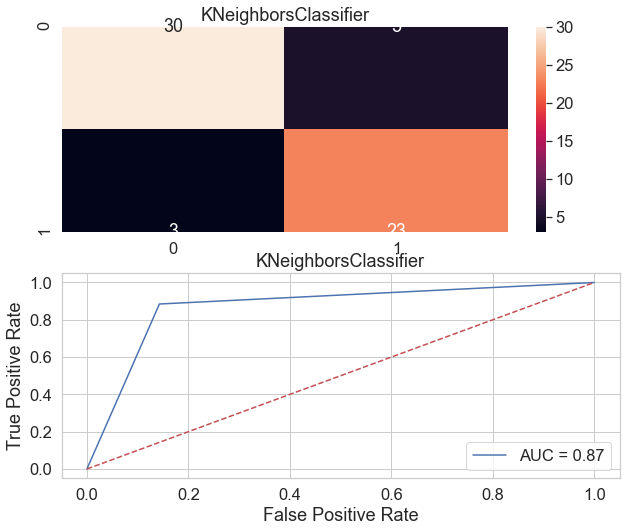

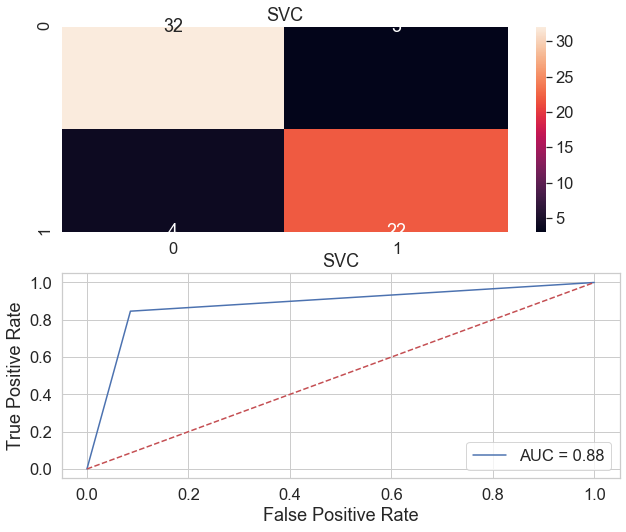

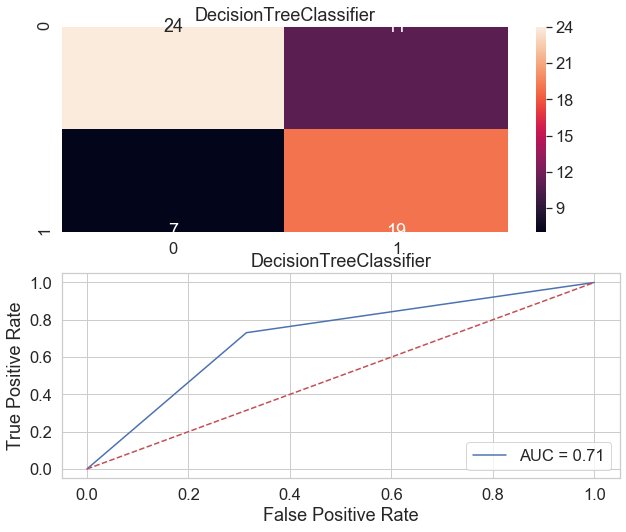

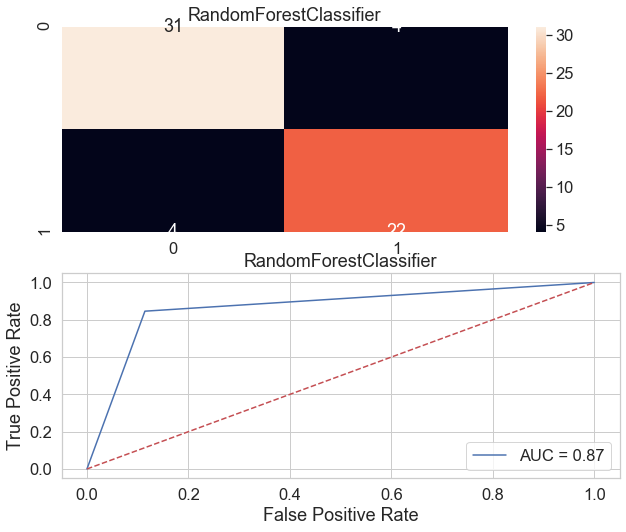

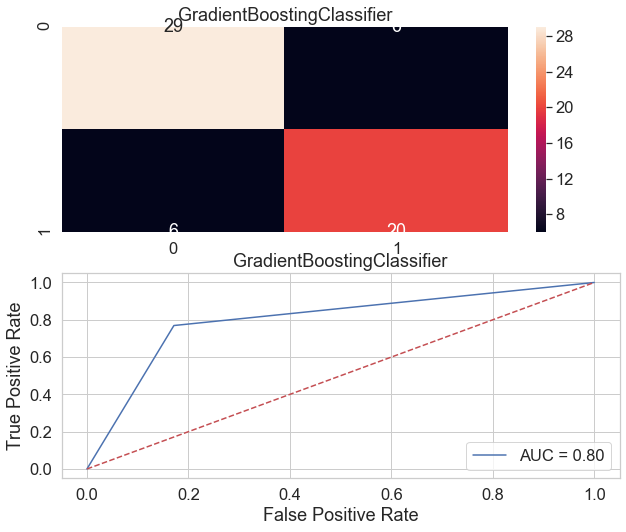

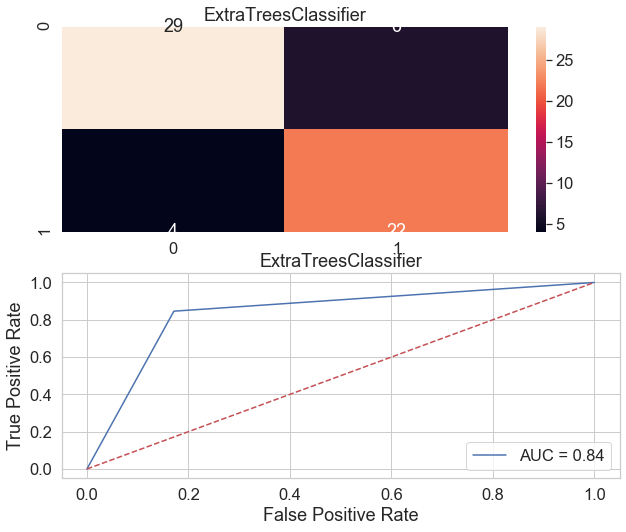

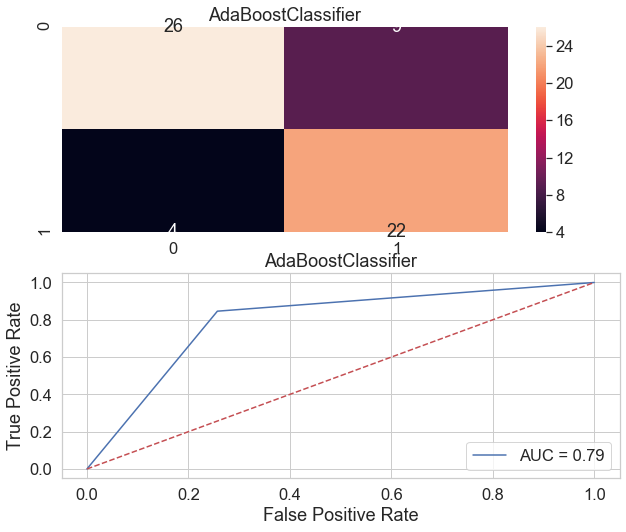

In [291]:
f1score =[]
Precisionscore = []
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    f1sco=f1_score(y_test,pre)
    print('F1_Score:',f1sco)
    f1score.append(f1sco)
    print('\n')
    pscore=precision_score(y_test,pre)
    print('Precision_Score:',pscore)
    Precisionscore.append(precision_score(y_test,pre))
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')     

In [292]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'F1_score': f1score,'Precision_score': Precisionscore,'Cross_val_score':cvs,'Roc_auc_score':rocscore})
result 

,Model,Accuracy_score,F1_score,Precision_score,Cross_val_score,Roc_auc_score
0,KNeighborsClassifier,0.868852,0.851852,0.821429,0.830371,87.087912
1,SVC,0.885246,0.862745,0.880000,0.827482,88.021978
2,DecisionTreeClassifier,0.704918,0.678571,0.633333,0.761346,70.824176
3,RandomForestClassifier,0.868852,0.846154,0.846154,0.820701,86.593407
4,GradientBoostingClassifier,0.803279,0.769231,0.769231,0.820816,79.890110
5,ExtraTreesClassifier,0.836066,0.814815,0.785714,0.831261,83.736264
6,AdaBoostClassifier,0.786885,0.771930,0.709677,0.797475,79.450549


From the above we can see that Support Vector Classifier is working good with 88 % accuracy score which is good based on data we have, so lets choose SVC as our final model.

In [294]:
from sklearn.externals import joblib
joblib.dump(SVC,'Model_Heart_Disease.obj')

['Model_Heart_Disease.obj']

In [295]:
model=joblib.load('Model_Heart_Disease.obj')